# Семинар 1
**План семинара:**
1. Получение информации об оборудовании
2. Библиотека Pytorch
  - установка (Windows/Linux(Google Colab); CPU/GPU)
  - обзор возможностей и особенностей
  - запуск простейших примеров
3. Введение в глубокое обучение
  - перцептрон (решение практических задач)

# Введение в глубокое обучение

In [1]:
import numpy as np

import torch
import torch.nn as nn

![alt text](https://drive.google.com/uc?export=view&id=19I2SrQHTO4njMHwCYh8fcaX-qOcKKy2A)

## **Задача 2**. Cделать нейрон, соответствующий оператору НЕ.

In [ ]:
class Neuron(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        return torch.heaviside(self.fc(x), torch.tensor([0.]))

In [ ]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

In [ ]:
neuron.fc.weight.data = torch.tensor([[-1.]])
neuron.fc.bias.data = torch.tensor([1.])

In [ ]:
x = torch.tensor([1.])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

## **Задача 3**. Cделать нейрон, соответствующий оператору И.

In [ ]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(2, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.]))

In [ ]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

In [ ]:
neuron.fc.weight.data = torch.tensor([[1., 1.]])
neuron.fc.bias.data = torch.tensor([-1.])

In [ ]:
x = torch.tensor([1., 1.])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

## **Задача 4**. Cделать нейрон, соответствующий оператору ИЛИ.

In [ ]:
neuron.fc.weight.data = torch.tensor([[1., 1.]])
neuron.fc.bias.data = torch.tensor([0.])

In [ ]:
x = torch.tensor([1., 0.])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

## **Задача 5**. Cделать нейрон, соответствующий оператору XOR.

In [ ]:
## P.s. Это конечно не линейный нейрон,
## но это одно из возможных реализаций xor

def activator(x):
    return torch.heaviside(x, torch.tensor([0.]))

class Neuron(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(2, 2)
        self.activator = activator
        self.fc2 = torch.nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activator(x)
        return self.fc2(x)

In [ ]:
neuron = Neuron()
neuron.fc1.weight, neuron.fc1.bias

In [ ]:
neuron.fc1.weight.data = torch.tensor([[-1., 1.], [1., -1.]])
neuron.fc2.weight.data = torch.tensor([[1., 1.]])

neuron.fc1.bias.data = torch.tensor([0.])
neuron.fc2.bias.data = torch.tensor([0.])

In [ ]:
x = torch.tensor([0., 1.])
neuron(x)

tensor([1.], grad_fn=<AddBackward0>)

# Домашнее задание

Дедлайн домашнего задания - текущее воскресенье 23:59. 

**Домашнее задание 0:** Создайте репозиторий на Github. Вся дальнейшая домашка загружается туда. Чуть позже в телеграм чате будет выложена форма для сдачи.

**Домашнее задание 1:** реализуйте XOR с помощью 3 нейронов. Запишите ответ в виде выражения, состоящего из объектов neuron() – моделей нейрона с пороговой функцией активации, внутри скобок может быть что угодно. Входы верхнего уровня называются x1 и x2. Пример фрагмента записи: neuron(1*x1 + 5*x2 - 0.1) + neuron(x1) (ответ будет выглядеть чуть сложнее, но других символов вроде && не потребуется).

In [ ]:
# Ответ: neuron(neuron(x1-x2) + neuron(x2-x1))

**Домашнее задание 2:** нарисуйте backward граф для выражения `a*b+c*d`. [Теория и пример оформления](https://www.youtube.com/watch?v=MswxJw-8PvE). Сравните полученные теоретические значения с аттрибутами grad у исходных тензоров.

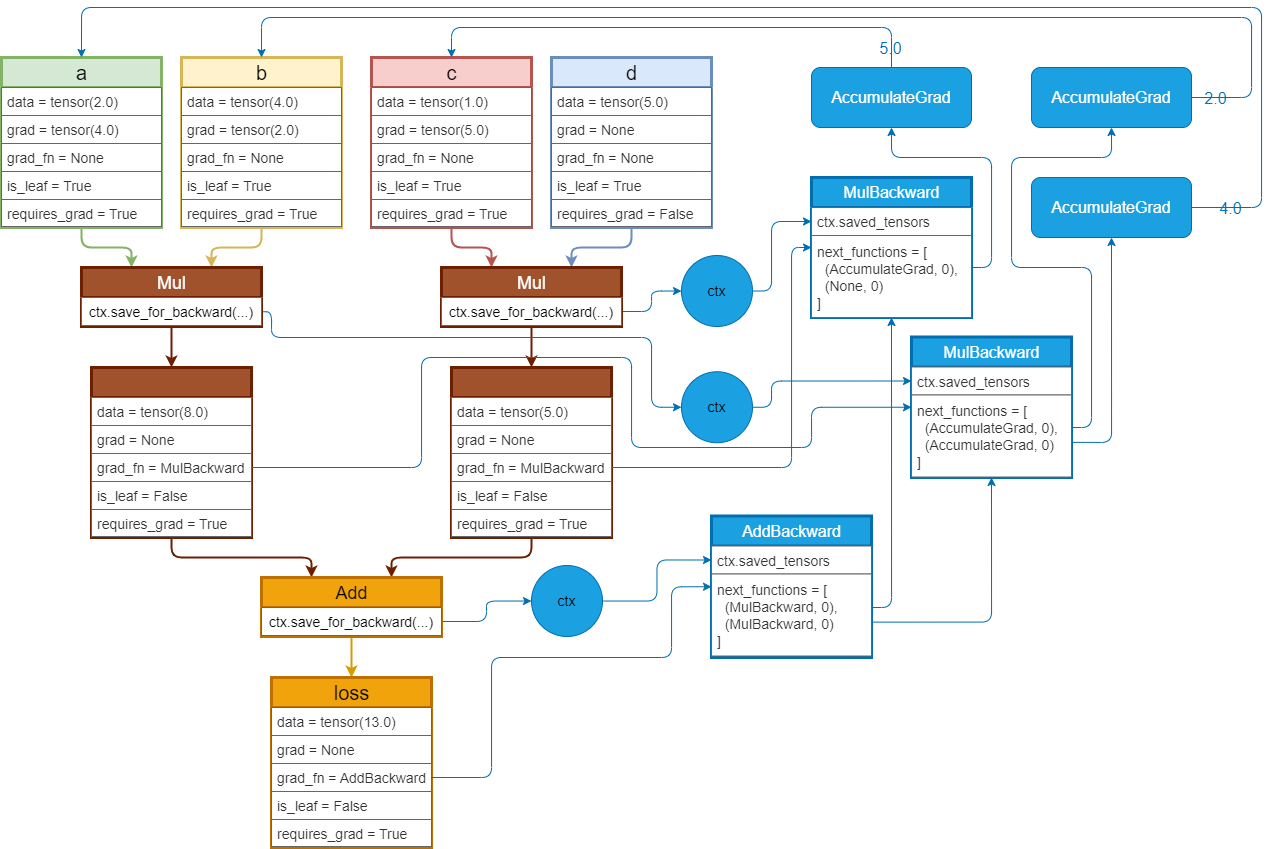

In [2]:
a = torch.tensor([2.], requires_grad=True)
b = torch.tensor([4.], requires_grad=True)
c = torch.tensor([1.], requires_grad=True)
d = torch.tensor([5.], requires_grad=False)

In [3]:
print(a.grad)

None


In [4]:
loss = a*b + c*d
loss.backward()

In [6]:
print(a.grad, b.grad, c.grad, d.grad)

tensor([4.]) tensor([2.]) tensor([5.]) None


**Домашнее задание 3:** Поэксперементируйте с размером тензоров, которые влезут на видеоркарту в Colab. Найдите максимальный размер тензора для типа данных float32, float64, float16, int32, int64. На сколько они отличаются.

In [ ]:
# Примерные значения, что я смог получить:
# float32 - 50_000 x 50_000
# float64 - 35_000 x 35_000
# int32 - 35_000 x 35_000
# int64 - 27_000 x 27_000

**Домашнее задание 4:** Напишите хороший пример неэффективного кода для занятия памяти видеокарты, который вызовет ошибку out of memory

In [ ]:
def allocate_empty_tensor(dim_size):
  a = torch.zeros(4096, dim_size, dtype=torch.float32, device='cuda')

allocate_empty_tensor(1_000_000)

**Домашнее задание 5:** Используя один линейный слой `nn.Linear` и один входной тензор `x` подберите размерности так, чтобы занимать всю видеопамять.
Попробуйте применить линейный слой к тензору `x`. Что произойдет? Кратко опишите ваши эксперименты. Что вы поняли?

In [ ]:
class Neuron(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 2_000_000_000)

    def forward(self, x):
        return torch.heaviside(self.fc(x), torch.tensor([0.]))

In [ ]:
neuron = Neuron()
neuron.fc.weight

# Рекомендуемые ссылки

- [Нейронные сети и компьютерное зрение, Samsung AI Center, часть 1](https://stepik.org/course/50352/syllabus)
- [Cимулятор](https://playground.tensorflow.org/) нейронов и нейронных сетей